<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame

# AIBNBN URL:
# CSV_URL = 'http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/listings.csv'

CSV_URL = 'https://github.com/RafaelGCruvinel/portfolio/raw/main/dataset/airbnb/london-2022-09-10/listings.csv'

df = pd.read_csv(CSV_URL)

## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `number_of_reviews_ltm` - The number of reviews the listing has (in the last 12 months)
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - The licence/permit/registration number


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [4]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


In [5]:
# removing columns with only one information:
for column in df.columns:
  unique_values = df[column].unique()
  print(f'Column {column} has {len(unique_values)} values.')
  if len(unique_values) == 1:
    print(f'❌Removing it. The unique value is: {unique_values[0]}')
    del df[column]

Column id has 69351 values.
Column name has 67030 values.
Column host_id has 45229 values.
Column host_name has 13044 values.
Column neighbourhood_group has 1 values.
❌Removing it. The unique value is: nan
Column neighbourhood has 33 values.
Column latitude has 28647 values.
Column longitude has 38106 values.
Column room_type has 4 values.
Column price has 1414 values.
Column minimum_nights has 124 values.
Column number_of_reviews has 434 values.
Column last_review has 2729 values.
Column reviews_per_month has 842 values.
Column calculated_host_listings_count has 77 values.
Column availability_365 has 366 values.
Column number_of_reviews_ltm has 157 values.
Column license has 1 values.
❌Removing it. The unique value is: nan


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
linhas, colunas = df.shape
print(f'Colunas {colunas}, Linhas: {linhas}. (depois da limpeza)')

# verificar as 5 primeiras entradas do dataset
print(df.dtypes)


Colunas 16, Linhas: 69351. (depois da limpeza)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

df_with_null = df.columns[df.isna().any()]

print((df[df_with_null].isnull().sum() / linhas).sort_values(ascending=False))

print('All others columns are 100% filled.')

last_review          0.241958
reviews_per_month    0.241958
name                 0.000303
host_name            0.000072
dtype: float64
All others columns are 100% filled.


### **Q3. Qual o tipo de distribuição das variáveis?** 

Bins: 27


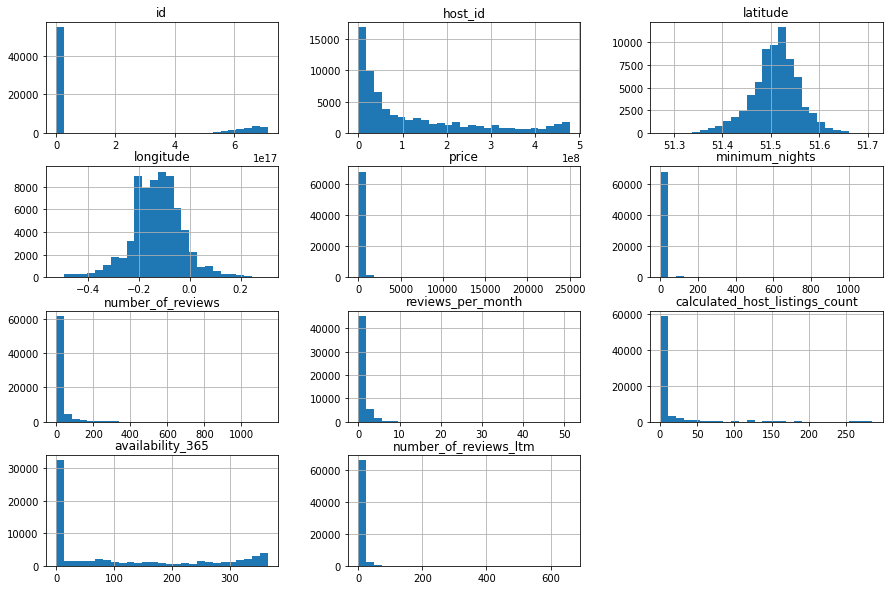

In [9]:
# plotar o histograma das variáveis numéricas
bins = round(0.5+linhas**0.5/10)
# considerar a raiz do número de dados estava ruim.
print(f'Bins: {bins}')
df.hist(bins=bins, figsize=(15,10));

Escala em log para facilitar a visualização de pequenos números.


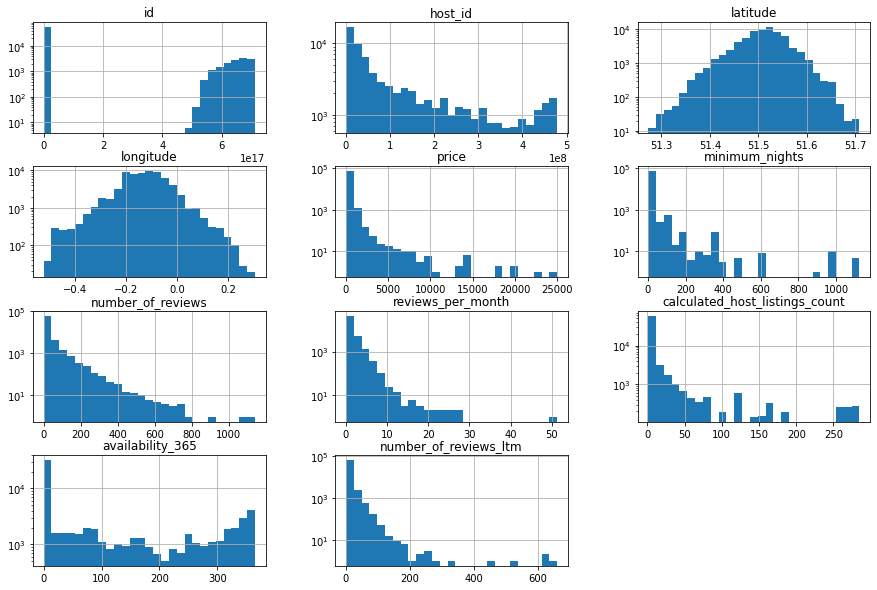

In [10]:
print('Escala em log para facilitar a visualização de pequenos números.')
df.hist(bins=bins, figsize=(15,10), log=True);

### **Q4. Qual a média dos preços de aluguel?**

In [11]:
# ver a média da coluna `price``
df.price.mean()

177.20882179060143

### **Q4. Qual a correlação existente entre as variáveis**

In [12]:
# criar uma matriz de correlação
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print(f'Numerical columns {numerical_columns}')

corr = df[numerical_columns].corr()

# mostrar a matriz de correlação
display(corr)

Numerical columns ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.394795,-0.005484,-0.022523,0.068821,-0.022010,-0.183322,0.404081,0.076359,0.329078,-0.065535
host_id,0.394795,1.000000,-0.007001,-0.015827,0.047994,-0.001701,-0.127723,0.255745,0.020839,0.272046,0.048701
latitude,-0.005484,-0.007001,1.000000,0.104005,-0.002646,0.013378,-0.009611,-0.007595,0.020422,-0.005311,-0.006939
longitude,-0.022523,-0.015827,0.104005,1.000000,-0.053463,0.006682,-0.036711,-0.030541,-0.066605,-0.029521,-0.028974
price,0.068821,0.047994,-0.002646,-0.053463,1.000000,0.031468,-0.050701,-0.006831,0.311791,0.103498,-0.025045
minimum_nights,-0.022010,-0.001701,0.013378,0.006682,0.031468,1.000000,-0.024343,-0.051467,0.011402,0.049954,-0.046728
number_of_reviews,-0.183322,-0.127723,-0.009611,-0.036711,-0.050701,-0.024343,1.000000,0.448302,-0.053315,0.057253,0.618813
reviews_per_month,0.404081,0.255745,-0.007595,-0.030541,-0.006831,-0.051467,0.448302,1.000000,-0.030488,0.243956,0.681553
calculated_host_listings_count,0.076359,0.020839,0.020422,-0.066605,0.311791,0.011402,-0.053315,-0.030488,1.000000,0.047197,-0.034618
availability_365,0.329078,0.272046,-0.005311,-0.029521,0.103498,0.049954,0.057253,0.243956,0.047197,1.000000,0.164814


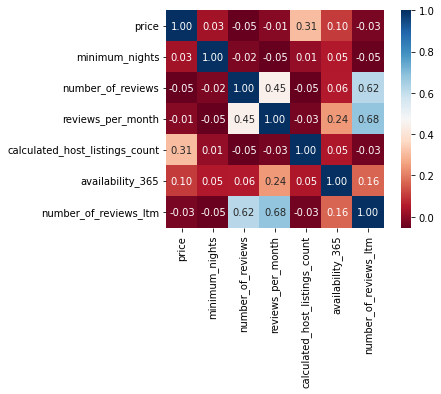

In [13]:
# plotar um heatmap a partir das correlações

remove_list = ['id', 'latitude', 'longitude', 'host_id']

clean_numerical_columns = [i for i in numerical_columns if i not in remove_list]
corr = df[clean_numerical_columns].corr()


sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Existem valores absurdos de diárias no dataset.

Para diminuir essa correlação, e tentar aferir melhor os dados, consideraremos apenas aqueles que tiveram avaliações no último mês.

In [14]:
# Limpeza de dados
# Existem dados 

df = df[df.number_of_reviews_ltm>0]

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    19879
Private room       11148
Hotel room           156
Shared room          140
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / linhas

Entire home/apt    0.286643
Private room       0.160748
Hotel room         0.002249
Shared room        0.002019
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [17]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[0:5]

neighbourhood
City of London            324.607438
Westminster               291.078657
Kensington and Chelsea    288.360000
Camden                    201.742542
Southwark                 190.276418
Name: price, dtype: float64

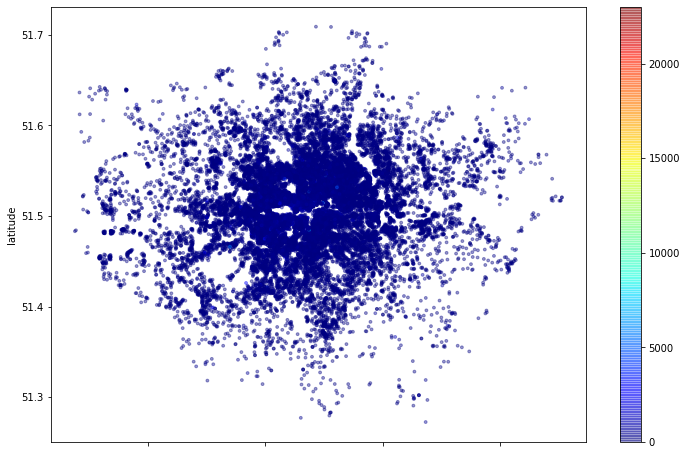

In [18]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [19]:
import plotly.express as px


fig = px.scatter_mapbox(df,lat='latitude',lon='longitude', hover_name="host_name", hover_data=["price"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``
# Existem algumas locações de até 3 anos, o que aumenta muito a média.
print(df.minimum_nights.mean())
print('A média é um número de 6 dias, portanto vamos avaliar por categorias para entender melhor o modelo:')

nights_by_room_type = df.groupby(['room_type']).minimum_nights.mean()


4.467260479519842
A média é um número de 6 dias, portanto vamos avaliar por categorias para entender melhor o modelo:


In [21]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

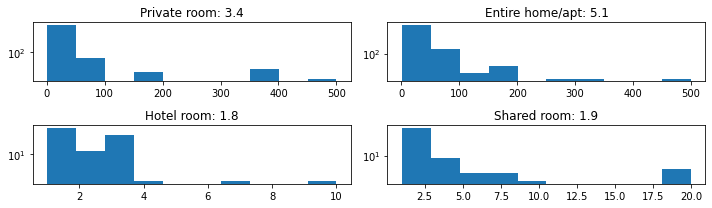

In [22]:
private_room = df[df.room_type == 'Private room'].minimum_nights
entire_home = df[df.room_type == 'Entire home/apt'].minimum_nights
hotel_room = df[df.room_type == 'Hotel room'].minimum_nights
shared_room = df[df.room_type == 'Shared room'].minimum_nights

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,3), tight_layout=True)

private_ax = ax[0][0]
private_ax.set_title(f"Private room: {private_room.mean():.1f}")
private_ax.hist(private_room, log=True)

entire_ax = ax[0][1]
entire_ax.set_title(f'Entire home/apt: {entire_home.mean():.1f}')
entire_ax.hist(entire_home, log=True)


hotel_ax = ax[1][0]
hotel_ax.set_title(f'Hotel room: {hotel_room.mean():.1f}')
hotel_ax.hist(hotel_room, log=True)

shared_ax = ax[1][1]
shared_ax.set_title(f'Shared room: {shared_room.mean():.1f}')
shared_ax.hist(shared_room, log=True)

plt.show()


## Conclusões


Foi observado um comportamento de valores muito grandes de diárias de locação, incluindo diárias mínimas de 3 anos.

Para esses casos, fizemos uma amostragem buscando no site oficial, e a hipótese é que o inquilino não quer reservar naquele período, mas quer continuar deixando o imóvel no site.

Sobre a disposição no mapa, a região central de Londres possui maior quantidade de locações, que diminuem com o afastamento.

Essa foi uma análise inicial e pode ser aprofundada posteriormente.

